#Desafio - Engenharia de Dados - PHOEBUS

###Candidato: Aldenis Everton Alves Guilherme de França

##1.1 PROGRAMAÇÃO

####Implementar ordenação por BubbleSort

In [333]:
def bubbleSort(array):
  itens = len(array)-1
  ordem = False
  while not ordem:
    ordem = True
    for i in range(itens):
      if array[i] > array[i+1]:
        array[i],array[i+1] = array[i+1],array[i]
        ordem = False
        print(array)

  return array

In [334]:
array = [5, 9, 54, 12, 7, 5, 6, 1]
bubbleSort(array)

[5, 9, 12, 54, 7, 5, 6, 1]
[5, 9, 12, 7, 54, 5, 6, 1]
[5, 9, 12, 7, 5, 54, 6, 1]
[5, 9, 12, 7, 5, 6, 54, 1]
[5, 9, 12, 7, 5, 6, 1, 54]
[5, 9, 7, 12, 5, 6, 1, 54]
[5, 9, 7, 5, 12, 6, 1, 54]
[5, 9, 7, 5, 6, 12, 1, 54]
[5, 9, 7, 5, 6, 1, 12, 54]
[5, 7, 9, 5, 6, 1, 12, 54]
[5, 7, 5, 9, 6, 1, 12, 54]
[5, 7, 5, 6, 9, 1, 12, 54]
[5, 7, 5, 6, 1, 9, 12, 54]
[5, 5, 7, 6, 1, 9, 12, 54]
[5, 5, 6, 7, 1, 9, 12, 54]
[5, 5, 6, 1, 7, 9, 12, 54]
[5, 5, 1, 6, 7, 9, 12, 54]
[5, 1, 5, 6, 7, 9, 12, 54]
[1, 5, 5, 6, 7, 9, 12, 54]


[1, 5, 5, 6, 7, 9, 12, 54]

##2.1 INSTACART

###Importação de Bibliotecas

In [335]:
# Bibliotecas para modelagem de dados
import pandas as pd
import numpy as np

# Bibliotecas para análises gráficas
import matplotlib.pyplot as plt

###Importação das Bases de Dados

In [336]:
# Leitura das bases de dados.

path = 'order_products__train.csv'
path2 = 'products.csv'

df_vendas = pd.read_csv(path, sep=',', encoding='ISO-8859-1')
df_prod = pd.read_csv(path2, sep=',', encoding='ISO-8859-1')

###Construção da Tabela Única

In [337]:
# Integração dos dados das tabelas de vendas e produtos.

df_completo = pd.merge(df_vendas, df_prod, how='left', on=['product_id'])

###Análise Exploratória dos Dados

In [338]:
# Visualização parcial do dataset completo.

df_completo.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16
2,1,10246,3,0,Organic Celery Hearts,83,4
3,1,49683,4,0,Cucumber Kirby,83,4
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15
5,1,13176,6,0,Bag of Organic Bananas,24,4
6,1,47209,7,0,Organic Hass Avocado,24,4
7,1,22035,8,1,Organic Whole String Cheese,21,16
8,36,39612,1,0,Grated Pecorino Romano Cheese,2,16
9,36,19660,2,1,Spring Water,115,7


In [339]:
# Relação dos 10 produtos mais vendidos.

df_completo.groupby('product_name').size().nlargest(10)

product_name
Banana                    18726
Bag of Organic Bananas    15480
Organic Strawberries      10894
Organic Baby Spinach       9784
Large Lemon                8135
Organic Avocado            7409
Organic Hass Avocado       7293
Strawberries               6494
Limes                      6033
Organic Raspberries        5546
dtype: int64

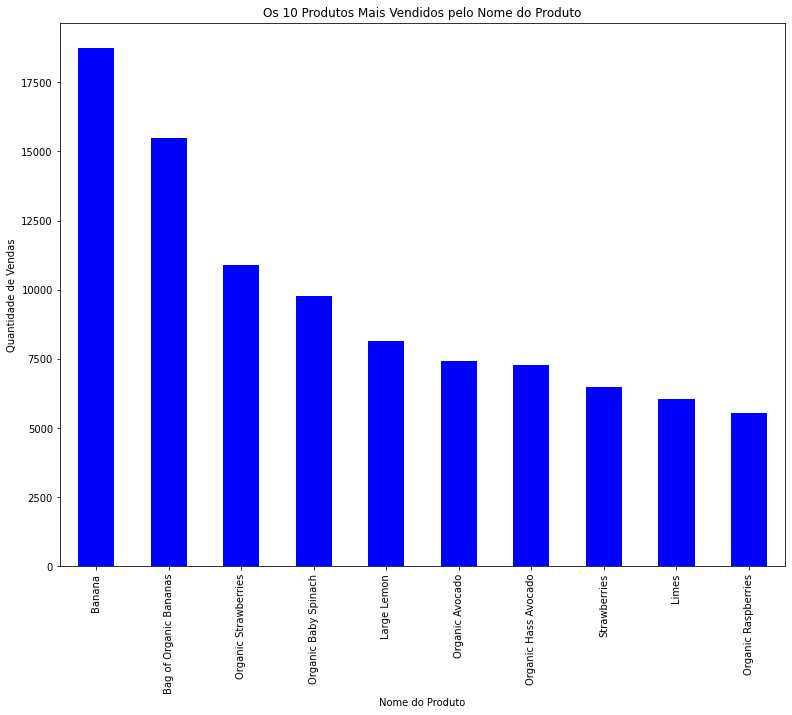

In [340]:
# Visualização Gráfica dos 10 produtos mais vendidos (Gráfico de Barras).

dez_maiores_bar = df_completo.groupby('product_name').size().nlargest(10).plot(kind='bar',xlabel='Nome do Produto',ylabel='Quantidade de Vendas',
                                                                           title='Os 10 Produtos Mais Vendidos pelo Nome do Produto',figsize=(13,10),color='b')


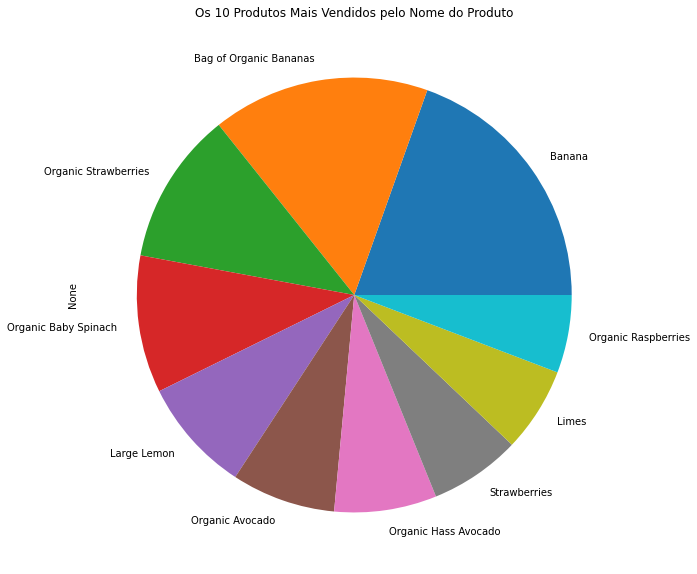

In [341]:
# Visualização Gráfica dos 10 produtos mais vendidos (Gráfico de Pizza).

dez_maiores_pie = df_completo.groupby('product_name').size().nlargest(10).plot(kind='pie',title='Os 10 Produtos Mais Vendidos pelo Nome do Produto',figsize=(13,10))


In [342]:
# Cálculo da Média dos Produtos por compra.

print('Média de Produtos x Compra:')
med_prod_comp = df_completo.groupby('order_id')['product_id'].size().mean()
print(f'\n{med_prod_comp}')

Média de Produtos x Compra:

10.552759338155157


##2.2 TITANIC

###Importação de Bibliotecas

In [343]:
# Bibliotecas para modelagem de dados
import pandas as pd
import numpy as np

# Bibliotecas para análises gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas/classes para tratamento dos dados categóricos
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Bibliotecas/classes para normalização dos dados
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# Bibliotecas/classes para divisão de treino e teste
from sklearn.model_selection import train_test_split

# Bibliotecas/classes para os modelos
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

###Importação da Base de Dados

In [344]:
# Leitura das bases de dados.

data = 'train.csv'
df_train = pd.read_csv(data, sep=',', encoding='ISO-8859-1')

###Análise Exploratória dos Dados

#####Dimensão dos Dados

In [345]:
# Especificação do número de linhas e colunas da base de dados.

print(f'QUANTIDADE DE LINHAS: {df_train.shape[0]}\n')
print(f'QUANTIDADE DE COLUNAS: {df_train.shape[1]}')

QUANTIDADE DE LINHAS: 891

QUANTIDADE DE COLUNAS: 12


#####Apresentação dos Dados

In [346]:
# Visualização parcial da base de dados.

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [347]:
# Nomes das colunas da base de dados.

df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#####Informações Estatísticas dos Dados

In [348]:
# Métricas estatísticas da base de dados.

df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [349]:
# Quantidade de dados nulos em cada coluna da base de dados.

df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [350]:
# Tipos de variáveis de cada coluna da base de dados.

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [351]:
# Agrupamento de Dados por classes.

print("AGRUPAMENTO de alguns dados por classes:\n")

print('Média de Classe por Sexo:')
sex_class = df_train.groupby('Sex')['Pclass'].mean()
print(sex_class)
print('')

print(df_train.groupby('Survived').size())
print('')

print(df_train.groupby('Cabin').size())
print('')

AGRUPAMENTO de alguns dados por classes:

Média de Classe por Sexo:
Sex
female    2.159236
male      2.389948
Name: Pclass, dtype: float64

Survived
0    549
1    342
dtype: int64

Cabin
A10    1
A14    1
A16    1
A19    1
A20    1
      ..
F33    3
F38    1
F4     2
G6     4
T      1
Length: 147, dtype: int64



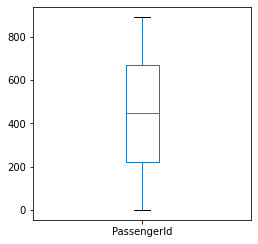

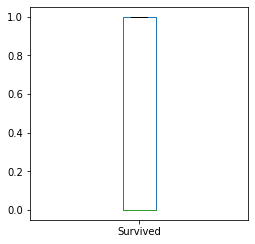

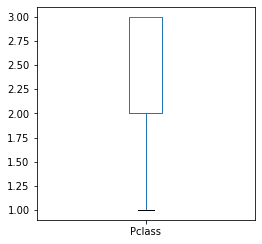

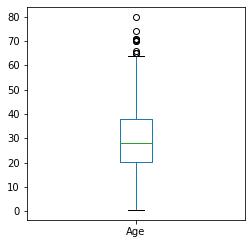

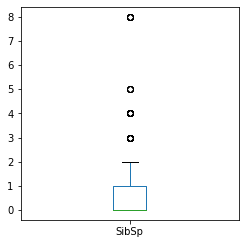

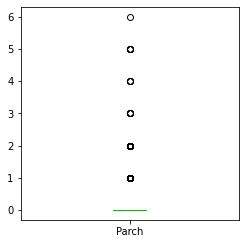

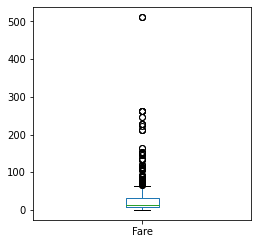

In [352]:
#Construção dos gráficos boxplot de cada classe numérica.

for nome_col in df_train.columns:
  if df_train[nome_col].dtype != object:
    df_train[nome_col].plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(18,18))
    plt.show()

HISTOGRAMAS dos dados de cada classe:



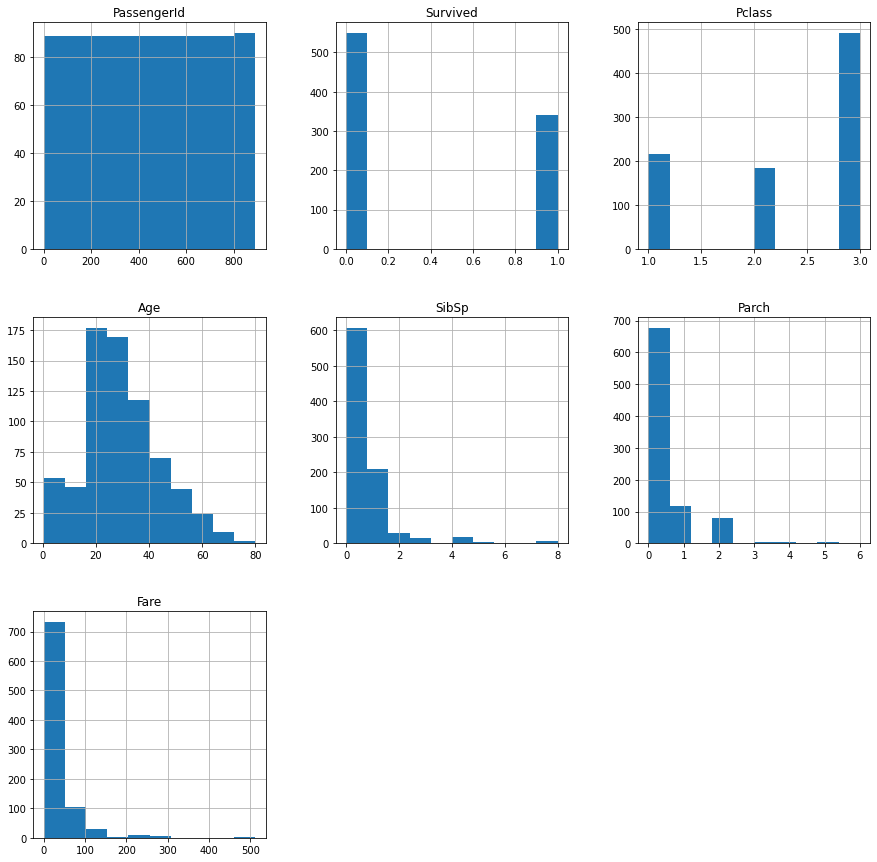

In [353]:
print("HISTOGRAMAS dos dados de cada classe:\n")

df_train.hist(layout=(3,3),figsize=(15,15))
plt.savefig('histogramas.jpg',dpi=200)

Matriz de Correlação - HEATMAP das Variáveis:



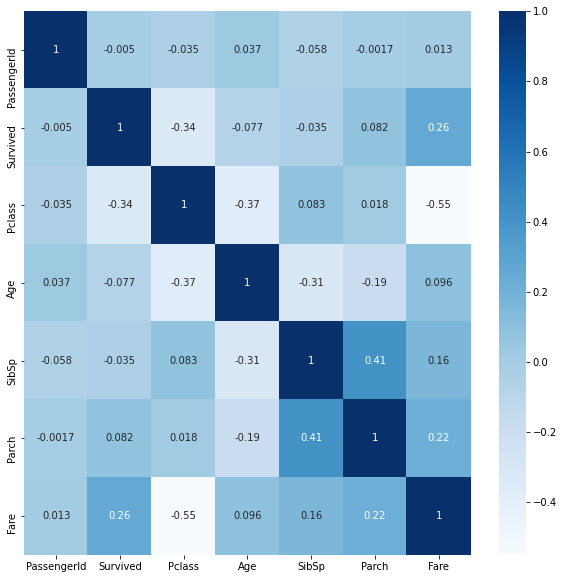

In [354]:
#Construção da matriz de correlação entre as classes do df_train.

print('Matriz de Correlação - HEATMAP das Variáveis:\n')
plt.figure(figsize=(10,10))
ax = sns.heatmap(df_train.corr(), cmap='Blues', annot=True)
plt.savefig('heatmap_df.jpg',dpi=200)

###Pré-processamento dos Dados

#####Remoção de colunas

In [355]:
# Remoção das colunas Survived, Name e PassengerId.

y = df_train.Survived
w = df_train.PassengerId
k = df_train.Name
df_train.drop(['Survived','Name','PassengerId'], axis=1, inplace=True)

#####Tratamento dos Dados Nulos

In [356]:
# Substituindo os valores nulos pela mediana ou por -1 (não informado).

col_null = [['Age'],['Cabin','Embarked']]

for i in range(0,len(col_null)):
  for col in col_null[i]:
    if i == 0:
      df_train[col].fillna(df_train[col].median(),inplace=True)
    elif i == 1:
      df_train[col].fillna(-1,inplace=True)

In [357]:
# Quantidade de dados nulos após o tratamento em cada coluna da base de dados.

df_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

#####Conversão dos Dados Categóricos em Numéricos

In [358]:
# Conversão dos dados das colunas object em strings.

df_train['Sex'] = df_train['Sex'].astype(str)
df_train['Ticket'] = df_train['Ticket'].astype(str)
df_train['Cabin'] = df_train['Cabin'].astype(str)
df_train['Embarked'] = df_train['Embarked'].astype(str)

In [359]:
# Aplicação da classe LabelEncoder às colunas categóricas
# para convertê-las em numéricas.

le = LabelEncoder()
for col in df_train.columns:
  if df_train[col].dtype == object:
    df_train[col] = le.fit_transform(df_train[col])
  else:
    pass

In [360]:
# Aplicação da classe One-Hot-Encoder às classes Pclass, Sex e Embarked.

onehotencoder = OneHotEncoder()
K = onehotencoder.fit_transform(df_train.Pclass.values.reshape(-1,1)).toarray()
W = onehotencoder.fit_transform(df_train.Sex.values.reshape(-1,1)).toarray()
Z = onehotencoder.fit_transform(df_train.Embarked.values.reshape(-1,1)).toarray()

In [361]:
# Conversão dos arrays K, W e Z OneHot para um Dataframe cada e adição das colunas desses 
# Dataframes (dfOneHot1, dfOneHot2 e dfOneHot3) ao nosso df_train.

dfOneHot1 = pd.DataFrame(K, columns= ['Class_'+str(int(i)) for i in range(K.shape[1])])
dfOneHot2 = pd.DataFrame(W, columns= ['Sex_'+str(int(i)) for i in range(W.shape[1])])
dfOneHot3 = pd.DataFrame(Z, columns= ['Embarked_'+str(int(i)) for i in range(Z.shape[1])])

df_train['Class_1'] = dfOneHot1['Class_0']
df_train['Class_2'] = dfOneHot1['Class_1']
df_train['Class_3'] = dfOneHot1['Class_2']

df_train['SEX_F'] = dfOneHot2['Sex_0']
df_train['SEX_M'] = dfOneHot2['Sex_1']

df_train['Embarked_C'] = dfOneHot3['Embarked_1']
df_train['Embarked_Q'] = dfOneHot3['Embarked_2']
df_train['Embarked_S'] = dfOneHot3['Embarked_3']
df_train['Embarked_NAO_INFOR'] = dfOneHot3['Embarked_0']

df_train.drop(['Pclass','Sex','Embarked'], axis=1, inplace=True)

print(df_train.shape)
df_train.head()

(891, 15)


,Age,SibSp,Parch,Ticket,Fare,Cabin,Class_1,Class_2,Class_3,SEX_F,SEX_M,Embarked_C,Embarked_Q,Embarked_S,Embarked_NAO_INFOR
0,22.0,1,0,523,7.2500,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,38.0,1,0,596,71.2833,82,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,26.0,0,0,669,7.9250,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,35.0,1,0,49,53.1000,56,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,35.0,0,0,472,8.0500,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [362]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 891 non-null    float64
 1   SibSp               891 non-null    int64  
 2   Parch               891 non-null    int64  
 3   Ticket              891 non-null    int64  
 4   Fare                891 non-null    float64
 5   Cabin               891 non-null    int64  
 6   Class_1             891 non-null    float64
 7   Class_2             891 non-null    float64
 8   Class_3             891 non-null    float64
 9   SEX_F               891 non-null    float64
 10  SEX_M               891 non-null    float64
 11  Embarked_C          891 non-null    float64
 12  Embarked_Q          891 non-null    float64
 13  Embarked_S          891 non-null    float64
 14  Embarked_NAO_INFOR  891 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 104.5 KB


#####Normalização dos Dados

In [363]:
# Normalização dos dados utilizando-se a classe MinMax do sklearn.

# obtendo os valores do dataset
X = df_train.values

# normaliza os dados
scaler = MinMaxScaler() 
normalizedX = scaler.fit_transform(X)

print('DADOS NORMALIZADOS\n')
np.set_printoptions(precision=3)
print(normalizedX)

DADOS NORMALIZADOS

[[0.271 0.125 0.    ... 0.    1.    0.   ]
 [0.472 0.125 0.    ... 0.    0.    0.   ]
 [0.321 0.    0.    ... 0.    1.    0.   ]
 ...
 [0.347 0.125 0.333 ... 0.    1.    0.   ]
 [0.321 0.    0.    ... 0.    0.    0.   ]
 [0.397 0.    0.    ... 1.    0.    0.   ]]


###Modelagem dos Dados

#####Divisão em Treino e Teste

In [364]:
# Trabalhar com uma semente fixa para geração de números aleatórios.
seed = 12

# Divisão dos dados em treino e teste.
X_train, X_test, y_train, y_test = train_test_split(normalizedX, y, test_size = 0.3, random_state = seed)

In [365]:
X_train

array([[0.347, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.259, 0.   , 0.   , ..., 0.   , 1.   , 0.   ],
       [0.347, 0.   , 0.   , ..., 0.   , 1.   , 0.   ],
       ...,
       [0.447, 0.125, 0.333, ..., 0.   , 1.   , 0.   ],
       [0.347, 0.   , 0.   , ..., 0.   , 1.   , 0.   ],
       [0.428, 0.   , 0.   , ..., 0.   , 0.   , 0.   ]])

(array([388, 235]), array([0. , 0.5, 1. ]))


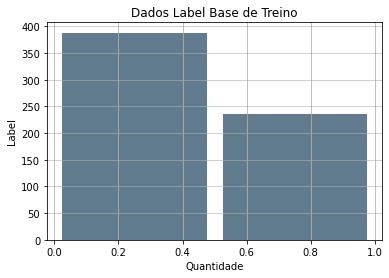

In [366]:
print(np.histogram(y_train, bins=2))
y_train.plot.hist(grid=True, bins=2, rwidth=0.9, color='#607c8e')
plt.title('Dados Label Base de Treino')
plt.xlabel('Quantidade')
plt.ylabel('Label')
plt.grid(axis='y', alpha=0.75)

In [367]:
X_test

array([[0.812, 0.   , 0.   , ..., 0.   , 1.   , 0.   ],
       [0.347, 0.   , 0.   , ..., 0.   , 1.   , 0.   ],
       [0.259, 0.   , 0.   , ..., 0.   , 1.   , 0.   ],
       ...,
       [0.698, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.409, 0.   , 0.   , ..., 0.   , 1.   , 0.   ],
       [0.347, 0.125, 0.   , ..., 0.   , 1.   , 0.   ]])

In [368]:
y_test

456    0
351    0
173    0
671    0
836    0
      ..
860    0
69     0
647    1
872    0
669    1
Name: Survived, Length: 268, dtype: int64

####Aplicação dos Modelos

#####Árvore de Decisão

In [369]:
# Implementação do Modelo de Árvore de Decisão

# Semente de números aleatórios
seed = 7
num_trees = 5000
max_features = 7

# Número de folds através do metodo k-fold
kfold = model_selection.StratifiedKFold(n_splits=10, random_state=seed)

# Criando a árvore de decisão
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=seed)

# Treinamento da árvore de decisão em dez folds
results_ad = model_selection.cross_val_score(clf, X_train, y_train, cv=kfold)
clf = clf.fit(X_train, y_train)

print('Decision Tree Folds', results_ad, '\n\nMédia do Treinamento: ',results_ad.mean())
print('\nAcurácia do Treinamento: ', clf.score(X_train, y_train))
print('\nAcurácia do Teste: ', clf.score(X_test, y_test))

Decision Tree Folds [0.778 0.762 0.841 0.839 0.726 0.806 0.758 0.742 0.823 0.79 ] 

Média do Treinamento:  0.7864823348694315

Acurácia do Treinamento:  0.9967897271268058

Acurácia do Teste:  0.7649253731343284


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


#####Random Forest

In [370]:
# Implementação do Modelo de Classificação Random Forest

# Criando o classificador Random Forest
model_rf = RandomForestClassifier(n_estimators=num_trees, max_features=max_features, random_state=seed)

# Treinamento do Random Forest em dez folds
results_rf = model_selection.cross_val_score(model_rf, X_train, y_train, cv=kfold)
model_rf = model_rf.fit(X_train, y_train)

print("Random Forest Folds:", results_rf, "\n\nMédia do Treinamento: " ,results_rf.mean())
print("\nAcurácia do Treinamento: ", model_rf.score(X_train, y_train))
print("\nAcurácia do Teste: ", model_rf.score(X_test, y_test))

Random Forest Folds: [0.81  0.825 0.889 0.935 0.823 0.871 0.806 0.839 0.887 0.839] 

Média do Treinamento:  0.8523809523809524

Acurácia do Treinamento:  0.9967897271268058

Acurácia do Teste:  0.8022388059701493


#####Análise Gráfica Comparativa

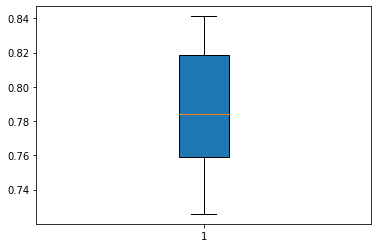

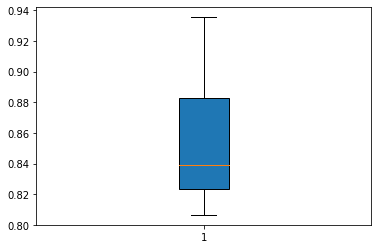

In [371]:
# Plotagem dos Boxplots dos Resultados

# Árvore de Decisão
plt.boxplot(results_ad, patch_artist=True) 
plt.show()

# Random Forest
plt.boxplot(results_rf, patch_artist=True)
plt.show()